In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
sys.path.append('../utils')
import Aircraft3dofModel
import FinaltimeFreeCost
import Aircraft3dofConstraints
from scipy.integrate import solve_ivp
from Scvx_tf_free import Scvx_tf_free
from Scaling import TrajectoryScaling

In [3]:
ix = 6
iu = 3
tf = 600
N = 50
delT = tf/N
max_iter = 50

In [4]:
myModel = Aircraft3dofModel.Aircraft3dof('Hello',ix,iu,linearization="analytic")
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = Aircraft3dofConstraints.Aircraft3dof('Hello',ix,iu)

x_min = np.zeros(ix)
x_max = np.array([110*1e3,60*1e3,10*1e3,240,np.deg2rad(20),np.pi/2])
u_min = np.array([0,0,0])
u_max = np.array([1.52,np.deg2rad(15),1126.3 * 1e3]) 

myScaling = TrajectoryScaling(x_min,x_max,u_min,u_max,tf)

In [52]:
xi = np.array([0*1e3,0*1e3,10*1e3,240,0,0])
xf = np.array([110*1e3,-60*1e3,0,95,-np.deg2rad(3),np.deg2rad(80)])
# xf = np.array([110*1e3,-0*1e3,0,95,-np.deg2rad(0),np.deg2rad(0)])

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
ui = np.array([0.5,np.deg2rad(0),0])
uf = np.array([0.5,-np.deg2rad(0),0])
for i in range(N+1) :
    u0[i] = (N-i)/N * ui + i/N * uf
    
idx_c = int(26 * N / 50)
for i in range(0,idx_c+1) :
    u0[i,0] = (idx_c-i)/idx_c * 0.3 + i/idx_c * 0.15
for i in range(idx_c+1,N+1) :
    u0[i,0] = 1/700 * (i-idx_c-1)**2 + 0.15

In [58]:
# w_tr for time is 1
i1 = Scvx_tf_free('aircraft',N,tf,max_iter,myModel,myCost,myConst,myScaling,
          type_discretization='foh',w_c=1.0,w_vc=1,w_tr=1e1,tol_vc=1e-6,tol_tr=1e-6,tol_bc=1,flag_policyopt=False)
x,u,xbar,ubar,tfbar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj = i1.run(x0,u0,xi,xf)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 11 03:08:22 PM: Your problem has 760 variables, 562 constraints, and 0 parameters.
(CVXPY) Feb 11 03:08:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 11 03:08:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 11 03:08:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 11 03:08:22 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Feb 11 03:08:22 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Feb 11 03:08:24 PM: Problem status: optimal
(CVXPY) Feb 11 03:08:24 PM: Optimal value: 6.269e+02
(CVXPY) Feb 11 03:08:24 PM: Compilation took 1.389e+00 seconds
(CVXPY) Feb 11 03:08:24 PM: Solver (including time spent in interface) took 9.051e-02 seconds
iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           626.880           116.042     16.4        49.4        -26.9       10.000      0(1.21e+05)
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Feb 11 03:08:25 PM: Your problem has 760 variables, 562 constraints, and 0 parameters.
(CVXPY) Feb 11 03:08:25 PM: It is compliant

(CVXPY) Feb 11 03:08:26 PM: 19  8.2e-13  1.0e-07  1.4e-13  1.00e+00   6.892499587e+03   6.892499351e+03   9.1e-14  0.06  
(CVXPY) Feb 11 03:08:27 PM: 20  1.8e-13  2.2e-08  1.5e-14  1.00e+00   6.892368174e+03   6.892368123e+03   2.0e-14  0.06  
(CVXPY) Feb 11 03:08:27 PM: Optimizer terminated. Time: 0.07    
(CVXPY) Feb 11 03:08:27 PM: 
(CVXPY) Feb 11 03:08:27 PM: 
(CVXPY) Feb 11 03:08:27 PM: Interior-point solution summary
(CVXPY) Feb 11 03:08:27 PM:   Problem status  : PRIMAL_AND_DUAL_FEASIBLE
(CVXPY) Feb 11 03:08:27 PM:   Solution status : OPTIMAL
(CVXPY) Feb 11 03:08:27 PM:   Primal.  obj: 6.8923681742e+03    nrm: 6e+02    Viol.  con: 1e-05    var: 2e-09    cones: 0e+00  
(CVXPY) Feb 11 03:08:27 PM:   Dual.    obj: 6.8923681226e+03    nrm: 1e+06    Viol.  con: 0e+00    var: 2e-04    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
----------------------------

(CVXPY) Feb 11 03:08:39 PM:   Problem status  : DUAL_INFEASIBLE
(CVXPY) Feb 11 03:08:39 PM:   Solution status : DUAL_INFEASIBLE_CER
(CVXPY) Feb 11 03:08:39 PM:   Primal.  obj: 5.2115785350e+02    nrm: 1e+02    Viol.  con: 2e-06    var: 1e+02    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Feb 11 03:08:39 PM: Problem status: infeasible
(CVXPY) Feb 11 03:08:39 PM: Optimal value: inf
(CVXPY) Feb 11 03:08:39 PM: Compilation took 8.701e-01 seconds
(CVXPY) Feb 11 03:08:39 PM: Solver (including time spent in interface) took 6.736e-02 seconds
infeasible FAIL: ValueError


UnboundLocalError: local variable 'sigma_bar' referenced before assignment

In [54]:
print(tfbar)

553.0072852632816


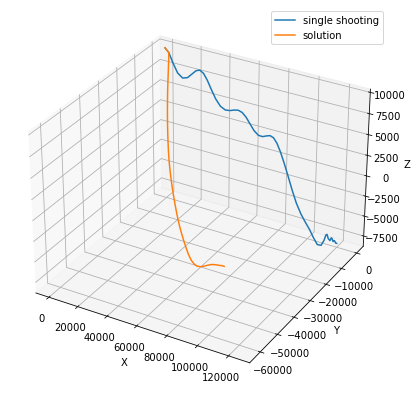

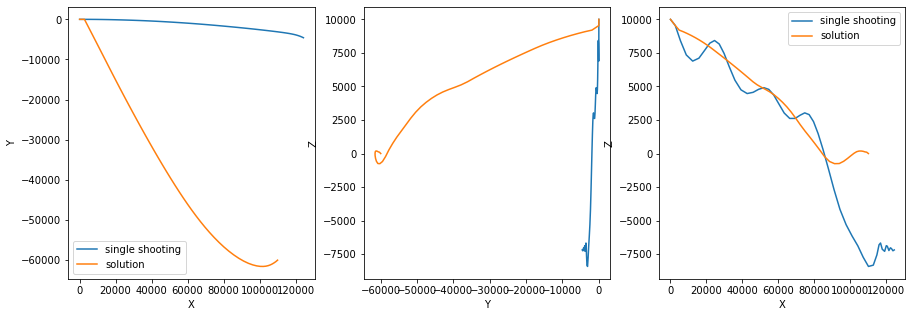

In [55]:
fig = plt.figure(1,figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(x[:, 0], x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],label='solution')
plt.legend()
fig = plt.figure(2,figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(x[:, 0], x[:, 1],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
ax = fig.add_subplot(132)
ax.plot(x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 1], xbar[:, 2],label='solution')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax = fig.add_subplot(133)
ax.plot(x[:, 0], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 2],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.legend()
# ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'o')

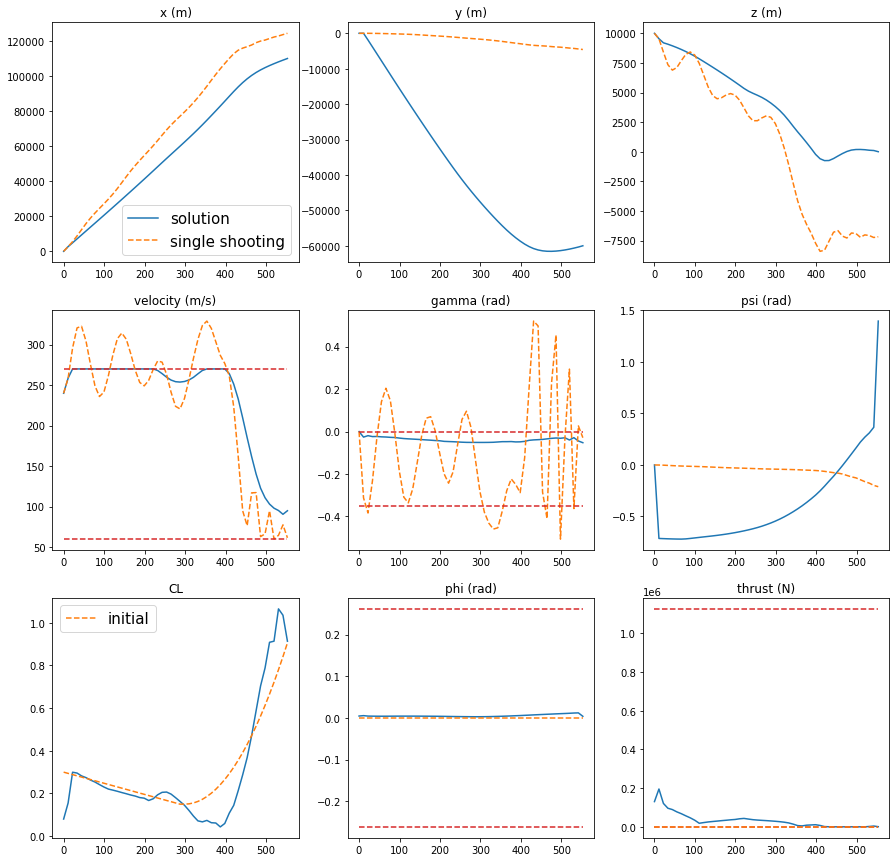

In [56]:
t_index = np.array([i for i in range(N+1)]) / N * tfbar
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.plot(t_index,xbar[:,0],label='solution')
plt.plot(t_index,x[:,0],'--',label='single shooting')
plt.legend(fontsize=15)
plt.title('x (m)')

plt.subplot(332)
plt.plot(t_index,xbar[:,1])
plt.plot(t_index,x[:,1],'--')
plt.title('y (m)')

plt.subplot(333)
plt.plot(t_index,xbar[:,2])
plt.plot(t_index,x[:,2],'--')
plt.title('z (m)')


plt.subplot(334)
plt.plot(t_index,xbar[:,3])
plt.plot(t_index,x[:,3],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_min,'--',color='tab:red')
plt.title('velocity (m/s)')

plt.subplot(335)
plt.plot(t_index,xbar[:,4])
plt.plot(t_index,x[:,4],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_min,'--',color='tab:red')
plt.title('gamma (rad)')

plt.subplot(336)
plt.plot(t_index,xbar[:,5])
plt.plot(t_index,x[:,5],'--')
plt.title('psi (rad)')

plt.subplot(337)
plt.plot(t_index,ubar[:,0])
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_max,'--',color='tab:red')
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_min,'--',color='tab:red')
plt.title('CL')
plt.plot(t_index,u0[:,0],'--',label='initial')
plt.legend(fontsize=15)
plt.subplot(338)
plt.plot(t_index,ubar[:,1])
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_min,'--',color='tab:red')
plt.title('phi (rad)')
plt.plot(t_index,u0[:,1],'--',label='initial')
plt.subplot(339)
plt.plot(t_index,ubar[:,2])
plt.plot(t_index,ubar[:,2]*0 + myConst.T_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.T_min,'--',color='tab:red')
plt.title('thrust (N)')
plt.plot(t_index,u0[:,2],'--',label='initial')

In [ ]:
T = 15.04 - 0.00649 * xbar[:,2] # celsius
p = 101.29 * np.power((T+273.1)/288.08,5.256)
rho = p / (0.2869 * (T + 273.1))

F_lift = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * ubar[:,0]
F_draf = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * (myModel.CD0 + myModel.K  * ubar[:,0] * ubar[:,0])

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(t_index,rho)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(338)
plt.plot(t_index,F_lift)
plt.title('Lift force (N)')

plt.subplot(339)
plt.plot(t_index,F_draf)
plt.title('Drag force (N)')

In [ ]:
for ubar_ in u_traj :
    plt.plot(t_index,ubar_[:,2],alpha=0.5,color='tab:blue')
# plt.title('CL')

In [ ]:
a = np.random.randn(3,2,3)
print(a)
print()
b = np.array([1,2,3])
print((a.T*b).T)

In [ ]:
a = np.random.randn(3,2)
print(a)
print(a.T*np.array([2,10,20]))